## 데이터 인코딩

머신러닝을 위한 대표적 인코딩 방식은

    1) 레이블 인코딩(Label Encoding)
    
    2) 원핫 인코딩(One_Hot Encoding)

###  레이블 인코딩

In [5]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

### preprocessing의 경우에는
### fit 및 transform이라는 estimator를 사용합니다. 
encoder = LabelEncoder()
encoder.fit(items) # 문자를 숫자로 변환
labels = encoder.transform(items) # 위에서 학습된 값을 기준으로 변환을 마무리
print('encoded values:', labels)

encoded values: [0 1 4 5 3 3 2 2]


In [6]:
# encoding class
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [8]:
# decoding 
print('디코딩 원본값:', encoder.inverse_transform([0, 1, 4, 5, 3, 3, 2, 2]))

디코딩 원본값: ['TV' '냉장고' '전자레인지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환한다. 하지만 레이블 인코딩이 일괄적인 숫자 값으로 변환이 되면서 몇몇 ML알고리즘에는 이를 적용할 경우 예측 성능이 떨어지는 경우가 발생할 수 있다.

이는 숫자 값의 경우 크고 작음에 대한 특성이 작용하기 때문이다. 즉, 냉장고가 1, 믹서가 2로 변환되면, 1보다 2가 더 큰 값이므로 특정 ML알고리즘에서 가중치가 더 부여되거나 더 중요하게 인식할 가능성이 발생한다. 하지만 냉장고와 믹서의 숫자 변환 값은 단순코드이지 숫자 값에 따른 순서나 중요도로 인식돼서는 안된다

###  원-핫 인코딩(One-Hot Encoding)

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [11]:
items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']


In [18]:
## 먼저 숫자 값으로의 변환을 위해 LabelEncoder를 수행
le = LabelEncoder()
le.fit(items)
labels = le.transform(items)

## 2차원 데이터로 변환
labels1 = labels.reshape(-1,1) # 재할당 (resassign)

## one-hot encoding 수행
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels1)
oh_labels = oh_encoder.transform(labels1)

print('원핫 인코딩 데이터 \n',oh_labels.toarray())
print('원핫 인코딩 shape \n',oh_labels.shape)

원핫 인코딩 데이터 
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원핫 인코딩 shape 
 (8, 6)


Pandas에는 One-Hot 인코딩을 더 쉽게 지원하는 API가 존재

get_dummies()를 활용해보시죠~

In [19]:
items

['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

In [24]:
import pandas as pd

dict1 = {'items':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']}
dict1

test_df = pd.DataFrame(dict1)
pd.get_dummies(test_df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자레인지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [26]:
### break

### 피쳐 스케일링과 정규화

서로 다른 변수의 값의 범위를 일정한 수준으로 일치시키는 작업을 피처 스케일링(Feature Scaling)이라고 합니다. 대표적인 방법으로는 표준화(Standardization) :: Z표준정규분포와 정규화(Normalizaition):: 최소-최대척도법이 존재합니다.

일반적으로 정규화는 서로 다른 피쳐(feature)의 크기를 통일하기 위해 크기를 변환해주는 개념입니다. 한 피쳐(즉, 변수)A는 거리를 나타내는 변수 0~ 100km로 주어지고, 두번째 피쳐(즉, 변수)B는 금액을 나타내는 속성으로써 0~100,000,000,000원으로 주어진다면 이 데이터들을 모두 최소값은 0, 최대값은 1로 변환하는 것이다.

혼선을 방지하기 위해 일반적인 의미의 표준화와 정규화를 피처 스케일링으로 통칭하고 선형대수 개념의 정규화를 벡터 정규화로 지칭하겠습니다. 먼저 사이킷런에서 제공하는 대표적인 피처 스케일링 클래스인 StandardScaler와 MinMaxScaler를 알아보겠습니다. 

### StandardScaler

StandardScaler는 앞에서 설명한 표준화를 쉽게 지원하기 위한 클래스이다. 즉, 개별 피쳐를 평균이 0이고, 분산이 1인 값으로 변환해준다. 이렇게 가우시안 정규 분포를 가질 수 있도록 데이터를 변환하는 것은 몇몇 알고리즘에서 매우 중요하다. 특히 사이킷런에서 구현한 RBF 커널을 이용하는 서포트 벡터 머신(Support Vector Machine)이나 선형회귀(Linear Regression), 로지스틱 회귀(Logistic Regression)는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현됐기 때문에 사전에 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소가 될 수 있다.

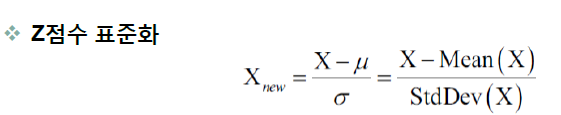 

In [27]:
from sklearn.datasets import load_iris
import pandas as pd
#붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환한다.
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [29]:
from sklearn.preprocessing import StandardScaler

#StandardScaler객체 생성
scaler=StandardScaler()
#StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# scaler.fit_transform() 한 번에 fit과 transform을 해주는 함수

#transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled= pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산값')
print(iris_df_scaled.var())

feature들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


## MinMaxScaler

다음으로 MinMaxScaler에 대해 알아보자. MinMaxScaler는 데이터 값을 0과 1사이의 범위 값으로 변환한다.(음수 값이 있으면 -1에서 1값으로 변환한다.) 데이터의 분포가 가우시안 분포가 아닐 경우에 Min, Max Scale을 적용해 볼 수 있다. 다음 예제를 통해 MinMaxScaler가 어떻게 동작하는지 확인해보자.

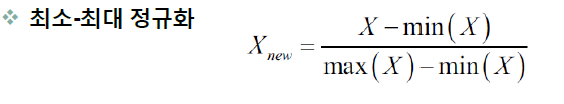 

In [30]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler객체 생성
scaler=MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환. fit()과 transform()호출.
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

#transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


* 데이터 전처리의 과정


    1) 결측치가 존재하면 안된다 - 최소,최대,평균,최빈값 대체

    2) 문자열

        1) Label_Encoder             
        2) One_hot Encoder
            
    3) 숫자의 경우 - 피쳐 스케일링

파이썬 기반에서 머신러닝을 수행하기 위한 다양한 요소를 살펴보았다. 데이터 분석가나 데이터 과학자로서의 역량을 증대하기 위해서는 머신러닝 알고리즘이나 이들 API에 대한 사용법 못지않게 데이터 분석에 대한 감을 강화하는 것이 중요하다. 이러한 데이터 능력을 향상시키는 가장 좋은 방법은 많은 데이터 분석 작업을 스스로 수행해 보는 것이다. 벽에 부딪힐 때마다 포기하지 않고 다양한 방법을 실전에 적용해 가면서 자신만의 데이터 분석에 대한 감을 쌓아 나가면 그 길에 도달할 수 있다. 다음으로 머신러닝 알고리즘을 이용해 캐글(kaggle)의 타이타닉 데이터 세트에서 생존자를 예측하는 예제를 작성해보자.

In [31]:
# end of files